In [15]:
import pandas as pd
import numpy as np
from haversine import haversine
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import chain
import copy

### Load data
Loading the data and converting the latitude and longtitude values to floats.

In [2]:
stores = pd.ExcelFile("Data Excercise 1 - EMTE stores - BA 2018.xlsx", sheetname="Sheet1").parse()
stores['Lat'] = stores['Lat'].astype('float')
stores['Long'] = stores['Long'].astype('float')

In [3]:
stores.head()

,Nr.,Name,Address,Postal code,City,Lat,Long
0,0,EMTE HEADQUARTERS VEGHEL,CORRIDOR 11,5466RB,VEGHEL,51.606702,5.528046
1,1,EMTE ARKEL,DR H DE VRIESPLN 14,4241BW,ARKEL,51.864000,4.993040
2,2,EMTE ARNEMUIDEN FR,CLASINASTR 5,4341ER,ARNEMUIDEN,51.500010,3.677280
3,3,EMTE BATHMEN FR,LARENSEWG 18,7437BM,BATHMEN,52.249060,6.289990
4,4,EMTE BEEK EN DONK,HEUVELPLN 73,5741JJ,BEEK EN DONK,51.529300,5.632300


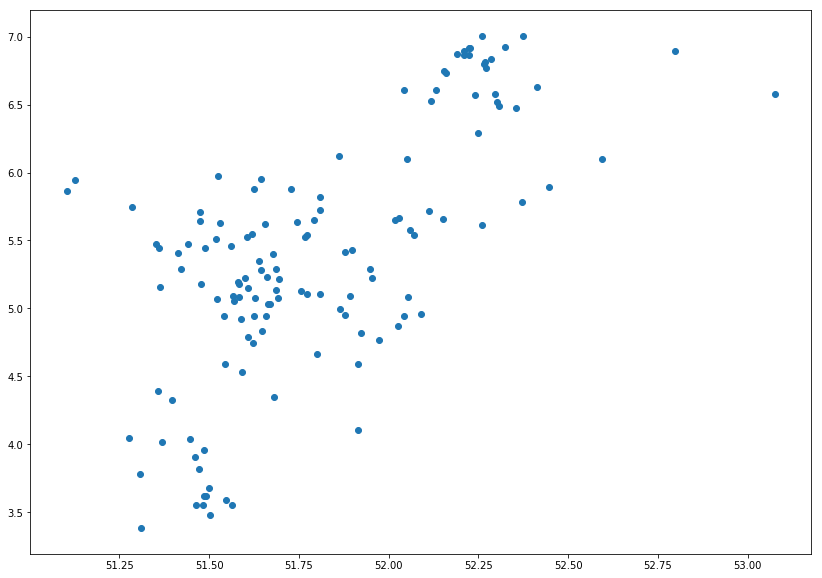

In [4]:
plt.figure(figsize=(14,10))
plt.scatter(stores['Lat'], stores['Long'])
plt.show()

### Create distance matrix

In [5]:
distance = np.empty((134,134))
for i in range(len(stores.as_matrix())):
    for j in range(len(stores.as_matrix())):
        distance[i,j] = haversine(stores.as_matrix()[i][-2:], stores.as_matrix()[j][-2:])     

In [6]:
pd.DataFrame(distance)

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,0.000000,46.645956,128.506126,88.494106,11.224886,12.042604,41.359815,88.980637,29.442647,36.761357,...,137.626826,23.511761,178.137015,117.031212,17.422608,32.633058,57.710789,26.358037,32.099404,142.137114
1,46.645956,0.000000,99.331062,98.468991,57.673426,34.648145,22.629025,108.643607,70.177933,9.884984,...,108.963877,24.330927,172.152042,127.132898,31.480083,20.026504,56.742367,50.641924,15.250641,111.849337
2,128.506126,99.331062,0.000000,197.742845,135.319052,120.594087,121.955525,207.484073,157.886528,104.524489,...,9.633966,108.671891,263.701235,226.177355,112.167277,98.865025,155.882612,145.392769,104.188325,13.731855
3,88.494106,98.468991,197.742845,0.000000,91.882841,87.966180,75.849785,21.704469,70.992771,94.466495,...,207.376534,95.768520,93.870425,29.277322,96.263331,103.797362,41.926484,62.278216,96.540126,210.047776
4,11.224886,57.673426,135.319052,91.882841,0.000000,23.214745,52.196130,89.703631,25.489607,47.802318,...,144.214954,34.014582,183.484584,119.578466,27.336538,42.480021,65.102086,31.853532,42.879860,149.028536
5,12.042604,34.648145,120.594087,87.966180,23.214745,0.000000,30.838584,91.362648,38.185562,24.765398,...,129.912014,12.539441,174.556820,117.076720,8.825753,22.357979,52.852614,26.724860,20.410664,134.078667
6,41.359815,22.629025,121.955525,75.849785,52.196130,30.838584,0.000000,86.377874,56.363010,19.989705,...,131.588842,28.633711,152.396121,104.590015,33.777118,32.334390,34.235210,33.450406,24.235116,134.424301
7,88.980637,108.643607,207.484073,21.704469,89.703631,91.362648,86.377874,0.000000,65.654553,102.971665,...,217.082373,101.172011,106.534475,33.563329,100.125724,110.213570,55.209711,64.638415,103.812338,220.298632
8,29.442647,70.177933,157.886528,70.992771,25.489607,38.185562,56.363010,65.654553,0.000000,60.813794,...,167.040636,50.713166,164.512141,97.057052,45.982941,60.535569,54.274630,23.923695,57.845412,171.492935
9,36.761357,9.884984,104.524489,94.466495,47.802318,24.765398,19.989705,102.971665,60.813794,0.000000,...,114.115465,14.870919,172.309806,123.526024,21.978064,13.423518,53.588620,42.437638,6.233781,117.438367


## Assignment 1.2 

### supporting functions

In [7]:
def get_distance(store_1, store_2):
    return distance[store_1][store_2]

def calculate_lenght_route(route):
    length = 0
    for i in range(len(route) - 1):
        length += get_distance(route[i],route[i+1])
    return length
    
def calculate_total_length(routes):
    total_dist = 0
    for route in routes:
        total_dist += calculate_lenght_route(route)
    return total_dist

def find_nearest_neighbour(unvisited_stores, current_store):
    current_NN = [0, get_distance(current_store, unvisited_stores[0])]
    for store in unvisited_stores:
        if get_distance(current_store, store) <= current_NN[1]:
            current_NN = [store, get_distance(current_store, store)]
    return current_NN[0]

def plot_routes(routes):
    plt.figure(figsize=(14,10))
    for route in routes:
        xseries = [stores.loc[store]['Long'] for store in route]
        yseries = [stores.loc[store]['Lat'] for store in route]
    
        plt.scatter(xseries, yseries)
        plt.plot(xseries, yseries)
        
def validity_check(routes):
    #No more than 400 km per manager
    constraint1 = max([calculate_lenght_route(route) for route in routes]) < 400
    #All stores visited once
    constraint2 = len([store for route in routes for store in route if store != 0]) == len(stores) -1
    #No stores visited more than once
    constraint3 = len(np.unique([store for route in routes 
                             for store in route if store != 0])) == len([store for route in routes 
                                                                       for store in route if store != 0])
    return(constraint1 and constraint2 and constraint3)

### Nearest neighbour

In [21]:
def Nearest_neighbour():
    unvisited_stores = list(range(1, len(stores)))
    routes = [] #List of lists containing all steps of the route
    while len(unvisited_stores) > 0:
        current_city = 0
        route = [0]
        while True:
            if len(unvisited_stores) > 0:
                candidate = find_nearest_neighbour(unvisited_stores, route[-1])
                if (calculate_lenght_route(route)+get_distance(route[-1], candidate)+ get_distance(candidate, 0)) < 400:
                    unvisited_stores.remove(candidate)
                    route.append(candidate)
                else:
                    route.append(0)
                    routes.append(route)
                    break
            else:
                route.append(0)
                routes.append(route)
                break
    return routes

routes = Nearest_neighbour()
validity_check(routes)
for route in routes:
    print('Distance traveled: {0:2f}, stores vistied: {1}'.format(calculate_lenght_route(route), route))
print('total distance travelend {}'.format(calculate_total_length(routes)))

Distance traveled: 354.491941, stores vistied: [0, 120, 115, 100, 91, 131, 74, 14, 8, 105, 122, 47, 46, 4, 103, 107, 25, 26, 121, 118, 117, 123, 17, 36, 112, 113, 114, 64, 55, 104, 129, 20, 125, 12, 128, 106, 5, 99, 42, 77, 76, 116, 18, 97, 81, 10, 11, 94, 35, 0]
Distance traveled: 366.565023, stores vistied: [0, 85, 84, 110, 111, 6, 13, 62, 1, 53, 39, 109, 88, 68, 43, 72, 9, 119, 132, 19, 60, 80, 87, 108, 86, 89, 0]
Distance traveled: 380.868552, stores vistied: [0, 93, 70, 21, 69, 63, 16, 3, 95, 96, 34, 37, 71, 7, 38, 0]
Distance traveled: 392.574228, stores vistied: [0, 23, 22, 24, 92, 58, 130, 90, 73, 78, 44, 75, 127, 49, 51, 50, 48, 33, 28, 31, 29, 30, 32, 40, 41, 65, 0]
Distance traveled: 387.534970, stores vistied: [0, 83, 56, 98, 45, 2, 67, 66, 59, 124, 133, 82, 101, 52, 57, 61, 54, 0]
Distance traveled: 395.601604, stores vistied: [0, 79, 15, 27, 126, 0]
Distance traveled: 304.797306, stores vistied: [0, 102, 0]
total distance travelend 2582.4336239768554


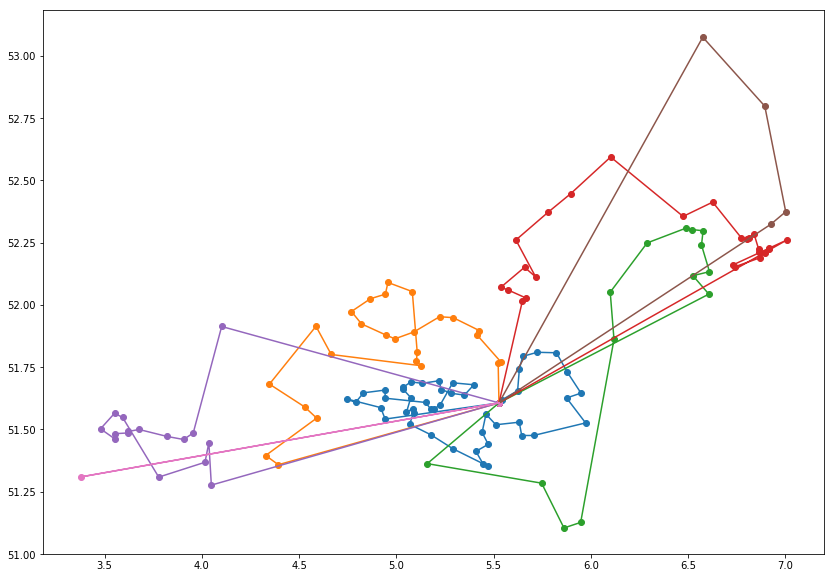

In [9]:
plot_routes(routes)

## Assignment 1.3

### Cityswap

In [30]:
def city_swap_within_route(routes):
    for j in range(len(routes)):
        best = False
        while not best:
            current_length = calculate_lenght_route(routes[j])
            for i in range(1,len(routes[j])-2):
                routes[j][i+1], routes[j][i] = routes[j][i], routes[j][i+1]
                if calculate_lenght_route(routes[j]) > current_length:
                    routes[j][i+1], routes[j][i] = routes[j][i], routes[j][i+1]
                else:
                    break      
            if current_length == calculate_lenght_route(routes[j]):
                break
    return routes

def retrive_possible_swaps(routes):
    None
    
def city_swap_between_routes(routes):
    for i in range(len(routes)):
        current_i = calculate_lenght_route(routes[i])
        for j in range(len(routes)):
            current_j = calculate_lenght_route(routes[j])
            if i is not j:
                for a in range(1,len(routes[i])-2):
                    for b in range(1,len(routes[j])-2):
                        routes[i][a], routes[j][b] = routes[j][b], routes[i][a]
                        
                        if not validity_check(routes):
                            routes[i][a], routes[j][b] = routes[j][b], routes[i][a]
                            #print(1)
                        elif calculate_lenght_route(routes[i]) > current_i:
                            routes[i][a], routes[j][b] = routes[j][b], routes[i][a]
                            #print(2)
                        elif calculate_lenght_route(routes[j]) > current_j:
                            routes[i][a], routes[j][b] = routes[j][b], routes[i][a]
                            #print(3)
                        else:
                            print(4)
    return routes

In [31]:
c_routes = copy.deepcopy(routes)
c_routes = city_swap_between_routes(c_routes)
print(validity_check(c_routes))
for route in c_routes:
    print('Distance traveled: {0}, stores vistied: {1}'.format(round(calculate_lenght_route(route),2), route))
print('total distance travelend {}'.format(calculate_total_length(c_routes)))

True
Distance traveled: 350.05, stores vistied: [0, 120, 115, 100, 91, 131, 74, 14, 8, 105, 122, 47, 46, 4, 103, 107, 25, 26, 121, 117, 118, 123, 17, 36, 114, 112, 113, 64, 55, 104, 129, 20, 125, 12, 128, 106, 5, 99, 42, 77, 76, 116, 18, 97, 81, 11, 10, 94, 35, 0]
Distance traveled: 366.57, stores vistied: [0, 85, 84, 110, 111, 6, 13, 62, 1, 53, 39, 109, 88, 68, 43, 72, 9, 119, 132, 19, 60, 80, 87, 108, 86, 89, 0]
Distance traveled: 380.87, stores vistied: [0, 93, 70, 21, 69, 63, 16, 3, 95, 96, 34, 37, 71, 7, 38, 0]
Distance traveled: 386.2, stores vistied: [0, 23, 22, 24, 92, 130, 58, 90, 73, 78, 44, 75, 127, 49, 51, 50, 48, 33, 28, 31, 29, 30, 40, 32, 65, 41, 0]
Distance traveled: 384.68, stores vistied: [0, 83, 56, 98, 45, 2, 67, 66, 124, 59, 133, 82, 101, 52, 61, 57, 54, 0]
Distance traveled: 395.6, stores vistied: [0, 79, 15, 27, 126, 0]
Distance traveled: 304.8, stores vistied: [0, 102, 0]
total distance travelend 2568.7659180481314


In [26]:
routes = city_swap_within_route(routes)
print(validity_check(routes))
for route in routes:
    print('Distance traveled: {0}, stores vistied: {1}'.format(round(calculate_lenght_route(route),2), route))
print('total distance travelend {}'.format(calculate_total_length(routes)))

True
Distance traveled: 350.05, stores vistied: [0, 120, 115, 100, 91, 131, 74, 14, 8, 105, 122, 47, 46, 4, 103, 107, 25, 26, 121, 117, 118, 123, 17, 36, 114, 112, 113, 64, 55, 104, 129, 20, 125, 12, 128, 106, 5, 99, 42, 77, 76, 116, 18, 97, 81, 11, 10, 94, 35, 0]
Distance traveled: 366.57, stores vistied: [0, 85, 84, 110, 111, 6, 13, 62, 1, 53, 39, 109, 88, 68, 43, 72, 9, 119, 132, 19, 60, 80, 87, 108, 86, 89, 0]
Distance traveled: 380.87, stores vistied: [0, 93, 70, 21, 69, 63, 16, 3, 95, 96, 34, 37, 71, 7, 38, 0]
Distance traveled: 386.2, stores vistied: [0, 23, 22, 24, 92, 130, 58, 90, 73, 78, 44, 75, 127, 49, 51, 50, 48, 33, 28, 31, 29, 30, 40, 32, 65, 41, 0]
Distance traveled: 384.68, stores vistied: [0, 83, 56, 98, 45, 2, 67, 66, 124, 59, 133, 82, 101, 52, 61, 57, 54, 0]
Distance traveled: 395.6, stores vistied: [0, 79, 15, 27, 126, 0]
Distance traveled: 304.8, stores vistied: [0, 102, 0]
total distance travelend 2568.7659180481314


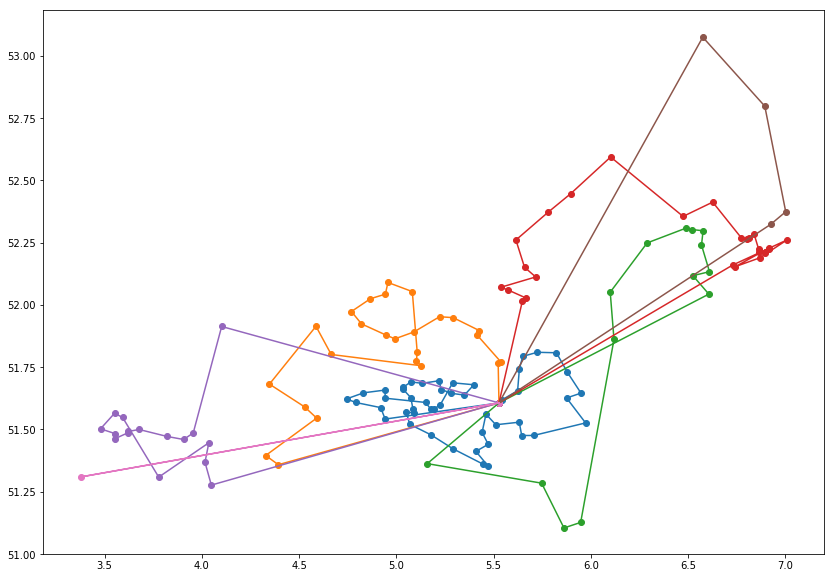

In [32]:
plot_routes(routes)

### 2 edge exchange